# IMERG products

The IMERG algorithms intercalibrate, merge, and interpolate satellite Passive Microwave (PMW) precipitation estimates, together with microwave-calibrated infrared (IR) satellite estimates, precipitation gauge analyses, and potentially other precipitation estimators at fine time and space scales for the TRMM and GPM eras over the entire globe.

The IMERG-ER (Early Run) and IMERG-LR (Late Run) products are considered Near-Real-Time (NRT) products. 

IMERG-ER is available 4 hours from NRT, while IMERG-LR is available after 12 hours.
The IMERG-FR (Final Run) product is instead produced with a delay of at least 3.5 months.

For more information on the IMERG products, please read the corresponding product technical documentation:

- [IMERG FR](https://gpm.nasa.gov/taxonomy/term/1417)
  
- [IMERG LR](https://gpm.nasa.gov/taxonomy/term/1415)
  
- [IMERG ER](https://gpm.nasa.gov/taxonomy/term/1357)

-------------------------------------------------------------------

Now let's import the package required in this tutorial.

In [ ]:
import datetime

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import ximage  # noqa

import gpm
from gpm.utils.geospatial import (
    get_circle_coordinates_around_point,
    get_country_extent,
)

Let's have a look at the available IMERG products:

In [ ]:
gpm.available_products(product_categories="IMERG", product_types="RS")

['IMERG-FR']

In [ ]:
gpm.available_products(product_categories="IMERG", product_types="NRT")

['IMERG-ER', 'IMERG-LR']

## 1. Download Data

Now let's download an IMERG product over a couple of hours.

To download GPM data with GPM-API, you have to previously create a [NASA Earthdata](https://urs.earthdata.nasa.gov/) and/or [NASA PPS](https://registration.pps.eosdis.nasa.gov/registration/) account.
We provide a step-by-step guide on how to set up your accounts in the [official GPM-API documentation](https://gpm-api.readthedocs.io/en/latest/03_quickstart.html).

In [ ]:
# Specify the time period you are interested in
start_time = datetime.datetime.strptime("2019-07-13 11:00:00", "%Y-%m-%d %H:%M:%S")
end_time = datetime.datetime.strptime("2019-07-13 13:00:00", "%Y-%m-%d %H:%M:%S")

# Specify the product and product type
product = "IMERG-FR"  # 'IMERG-ER' 'IMERG-LR'
product_type = "RS"  # "NRT"
storage = "PPS"
# Specify the version
version = 7

In [ ]:
# Download the data
gpm.download(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    storage=storage,
    force_download=False,
    verbose=True,
    progress_bar=True,
    check_integrity=False,
)

100%|██████████| 4/4 [00:13<00:00,  3.26s/it]

4 files has been download.
All the available GPM IMERG-FR product files are now on disk.


Once, the data are downloaded on disk, let's load the IMERG product and look at the dataset structure.

## 2. Load Data

With GPM-API, the name granule is used to refer to a single file, while the name dataset is used to refer to a collection of granules.

GPM-API enables to open single or multiple granules into `xarray`, a software designed for working with labeled multi-dimensional arrays.

- The `gpm.open_granule_dataset(filepath)` opens a single granule into a `xarray.Dataset` object by providing the path of the file of interest.
- The `gpm.open_dataset` function enable to open a collection of granules over a period of interest  into `xarray.Dataset` object.

In [ ]:
# Load IMERG dataset
ds = gpm.open_dataset(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
)
ds

<xarray.Dataset> Size: 1GB
Dimensions:                         (time: 4, lat: 1800, lon: 3600, lonv: 2,
                                     latv: 2, nv: 2)
Coordinates:
    lon_bnds                        (lonv, lon) float32 29kB dask.array<chunksize=(2, 3600), meta=np.ndarray>
    lat_bnds                        (latv, lat) float32 14kB dask.array<chunksize=(2, 1800), meta=np.ndarray>
  * lon                             (lon) float32 14kB -179.9 -179.9 ... 179.9
  * lat                             (lat) float32 7kB -89.95 -89.85 ... 89.95
    time_bnds                       (time, nv) datetime64[ns] 64B 2019-07-13T...
  * time                            (time) datetime64[ns] 32B 2019-07-13T11:3...
    crsWGS84                        int64 8B 0
Dimensions without coordinates: lonv, latv, nv
Data variables:
    precipitation                   (time, lat, lon) float32 104MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    randomError                     (time, lat, lon) float32 104MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lat, lon) float32 104MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    precipitationQualityIndex       (time, lat, lon) float32 104MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    MWprecipitation                 (time, lat, lon) float32 104MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    MWprecipSource                  (time, lat, lon) float32 104MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    MWobservationTime               (time, lat, lon) float64 207MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    IRprecipitation                 (time, lat, lon) float32 104MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    IRinfluence                     (time, lat, lon) float32 104MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    precipitationUncal              (time, lat, lon) float32 104MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
Attributes: (12/15)
    FileName:           3B-HHR.MS.MRG.3IMERG.20190713-S110000-E112959.0660.V0...
    MissingData:        
    DOI:                10.5067/GPM/IMERG/3B-HH/07
    DOIauthority:       http://dx.doi.org/
    AlgorithmID:        3IMERGHH
    AlgorithmVersion:   3IMERGH_7.0
    ...                 ...
    ProcessingSystem:   PPS
    DataFormatVersion:  7e
    MetadataVersion:    7e
    ScanMode:           Grid
    history:            Created by ghiggi/gpm_api software on 2025-03-02 13:0...
    gpm_api_product:    IMERG-FR

If you are interested to work only with a specific subset of variables, you can specify their names using the `variables` argument in `gpm.open_dataset` function.

In [ ]:
ds1 = gpm.open_dataset(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    variables=["precipitation", "probabilityLiquidPrecipitation"],
)
ds1

<xarray.Dataset> Size: 207MB
Dimensions:                         (time: 4, lat: 1800, lon: 3600, nv: 2)
Coordinates:
  * lon                             (lon) float32 14kB -179.9 -179.9 ... 179.9
  * lat                             (lat) float32 7kB -89.95 -89.85 ... 89.95
    time_bnds                       (time, nv) datetime64[ns] 64B 2019-07-13T...
  * time                            (time) datetime64[ns] 32B 2019-07-13T11:3...
    crsWGS84                        int64 8B 0
Dimensions without coordinates: nv
Data variables:
    precipitation                   (time, lat, lon) float32 104MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lat, lon) float32 104MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
Attributes: (12/15)
    FileName:           3B-HHR.MS.MRG.3IMERG.20190713-S110000-E112959.0660.V0...
    MissingData:        
    DOI:                10.5067/GPM/IMERG/3B-HH/07
    DOIauthority:       http://dx.doi.org/
    AlgorithmID:        3IMERGHH
    AlgorithmVersion:   3IMERGH_7.0
    ...                 ...
    ProcessingSystem:   PPS
    DataFormatVersion:  7e
    MetadataVersion:    7e
    ScanMode:           Grid
    history:            Created by ghiggi/gpm_api software on 2025-03-02 11:1...
    gpm_api_product:    IMERG-FR

## 3. Basic Manipulations

You can list variables, coordinates and dimensions with the following methods:

In [ ]:
# Available variables
variables = list(ds.data_vars)
print("Available variables: ", variables)
# Available coordinates
coords = list(ds.coords)
print("Available coordinates: ", coords)
# Available dimensions
dims = list(ds.dims)
print("Available dimensions: ", dims)

Available variables:  ['precipitation', 'randomError', 'probabilityLiquidPrecipitation', 'precipitationQualityIndex', 'MWprecipitation', 'MWprecipSource', 'MWobservationTime', 'IRprecipitation', 'IRinfluence', 'precipitationUncal']
Available coordinates:  ['lon_bnds', 'lat_bnds', 'lon', 'lat', 'time_bnds', 'time', 'crsWGS84']
Available dimensions:  ['time', 'lat', 'lon', 'lonv', 'latv', 'nv']


To select the DataArray corresponding to a single variable:

In [ ]:
variable = "precipitation"
da = ds[variable]
print("Data type of numerical array: ", type(da.data))
da

Data type of numerical array:  <class 'dask.array.core.Array'>


<xarray.DataArray 'precipitation' (time: 4, lat: 1800, lon: 3600)> Size: 104MB
dask.array<transpose, shape=(4, 1800, 3600), dtype=float32, chunksize=(1, 1800, 3600), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.8 179.9
  * lat       (lat) float32 7kB -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
  * time      (time) datetime64[ns] 32B 2019-07-13T11:30:00 ... 2019-07-13T13...
    crsWGS84  int64 8B 0
Attributes:
    units:            mm/hr
    description:      Complete merged microwave-infrared (gauge-adjusted) pre...
    gpm_api_product:  IMERG-FR
    valid_min:        0
    valid_max:        1000
    gpm_api_decoded:  yes
    grid_mapping:     crsWGS84

If the array class is `dask.Array`, it means that the data are not yet loaded into RAM memory. 
To put the data into memory, you need to call the method `compute`, either on the xarray object or on the numerical array.

In [ ]:
da = da.compute()
print("Data type of numerical array: ", type(da.data))
da

Data type of numerical array:  <class 'numpy.ndarray'>


<xarray.DataArray 'precipitation' (time: 4, lat: 1800, lon: 3600)> Size: 104MB
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]]], dtype=float32)
Coordinates:
  * lon       (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.8 179.9
  * lat       (lat) float32 7kB -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
  * time      (time) datetime64[ns] 32B 2019-07-13T11:30:00 ... 2019-07-13T13...
    crsWGS84  int64 8B 0
Attributes:
    units:            mm/hr
    description:      Complete merged microwave-infrared (gauge-adjusted) pre...
    gpm_api_product:  IMERG-FR
    valid_min:        0
    valid_max:        1000
    gpm_api_decoded:  yes
    grid_mapping:     crsWGS84

To extract the numerical array from the xarray.DataArray, you can use:

In [ ]:
da.data

array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       [[ nan,  nan,  nan, ...,  nan,

To check that the loaded GPM IMERG product has regular (no missing) timesteps, you can use:

In [ ]:
print(ds.gpm.has_regular_time)
print(ds.gpm.is_regular)

True
True


In case there are missing timesteps, you can obtain the time slices over which the dataset is regular:

In [ ]:
list_slices = ds.gpm.get_slices_regular_time()
print(list_slices)

[slice(0, 4, None)]


You can then select a regular portion of the dataset with:

In [ ]:
slc = list_slices[0]
print(slc)

slice(0, 4, None)


In [ ]:
ds_regular = ds.isel(time=slc)

To instead check if the open dataset has a single or multiple timestep, you can use: 

In [ ]:
ds.gpm.is_spatial_2d

False

In [ ]:
ds.isel(time=0).gpm.is_spatial_2d

True

Note that you can also select a timestep by value using the `sel` method:

In [ ]:
ds.sel(time="2019-07-13T11:30:00")

<xarray.Dataset> Size: 285MB
Dimensions:                         (lat: 1800, lon: 3600, lonv: 2, latv: 2,
                                     nv: 2)
Coordinates:
    lon_bnds                        (lonv, lon) float32 29kB dask.array<chunksize=(2, 3600), meta=np.ndarray>
    lat_bnds                        (latv, lat) float32 14kB dask.array<chunksize=(2, 1800), meta=np.ndarray>
  * lon                             (lon) float32 14kB -179.9 -179.9 ... 179.9
  * lat                             (lat) float32 7kB -89.95 -89.85 ... 89.95
    time_bnds                       (nv) datetime64[ns] 16B 2019-07-13T11:00:...
    time                            datetime64[ns] 8B 2019-07-13T11:30:00
    crsWGS84                        int64 8B 0
Dimensions without coordinates: lonv, latv, nv
Data variables:
    precipitation                   (lat, lon) float32 26MB dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    randomError                     (lat, lon) float32 26MB dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    probabilityLiquidPrecipitation  (lat, lon) float32 26MB dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    precipitationQualityIndex       (lat, lon) float32 26MB dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    MWprecipitation                 (lat, lon) float32 26MB dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    MWprecipSource                  (lat, lon) float32 26MB dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    MWobservationTime               (lat, lon) float64 52MB dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    IRprecipitation                 (lat, lon) float32 26MB dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    IRinfluence                     (lat, lon) float32 26MB dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    precipitationUncal              (lat, lon) float32 26MB dask.array<chunksize=(1800, 3600), meta=np.ndarray>
Attributes: (12/15)
    FileName:           3B-HHR.MS.MRG.3IMERG.20190713-S110000-E112959.0660.V0...
    MissingData:        
    DOI:                10.5067/GPM/IMERG/3B-HH/07
    DOIauthority:       http://dx.doi.org/
    AlgorithmID:        3IMERGHH
    AlgorithmVersion:   3IMERGH_7.0
    ...                 ...
    ProcessingSystem:   PPS
    DataFormatVersion:  7e
    MetadataVersion:    7e
    ScanMode:           Grid
    history:            Created by ghiggi/gpm_api software on 2025-03-02 13:0...
    gpm_api_product:    IMERG-FR

To locate the location where maximum precipitation occurs, you can for example use the `locate_max_value` method:

In [ ]:
print(ds["precipitation"].gpm.locate_max_value(return_isel_dict=True))  # {'lon': lon_index, 'lat': lat_idex}
print(ds["precipitation"].gpm.locate_max_value())  # (lon, lat)

{'lon': 3510, 'lat': 463}
(171.0500030517578, -43.64999771118164)


## 4. Plot Maps

The GPM-API provides two ways of displaying the data:
- The `plot_map` method plot the data in a geographic projection using the Cartopy `imshow` method
- The `plot_image` method plot the data as an image using the Maplotlib `imshow` method

Let's start by plotting a single timestep:

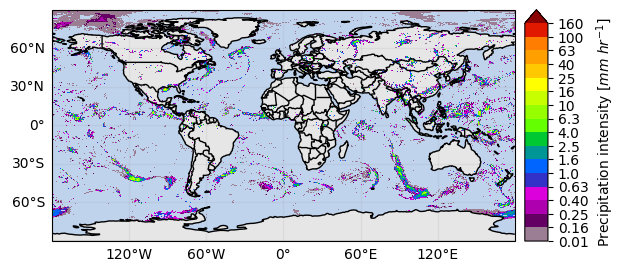

In [ ]:
ds[variable].isel(time=0).gpm.plot_map()  # With cartopy

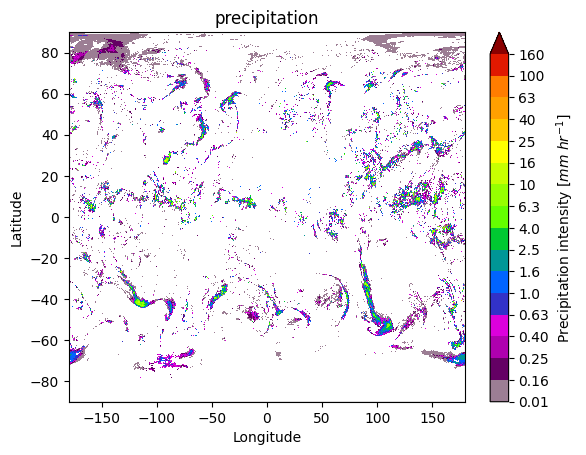

In [ ]:
ds[variable].isel(time=0).gpm.plot_image()  # Without cartopy

You can customize the map projection by passing a `cartopy.crs.Projection` to the subplot. 
The available projections are [listed here]( https://scitools.org.uk/cartopy/docs/latest/reference/projections.html?highlight=projections).

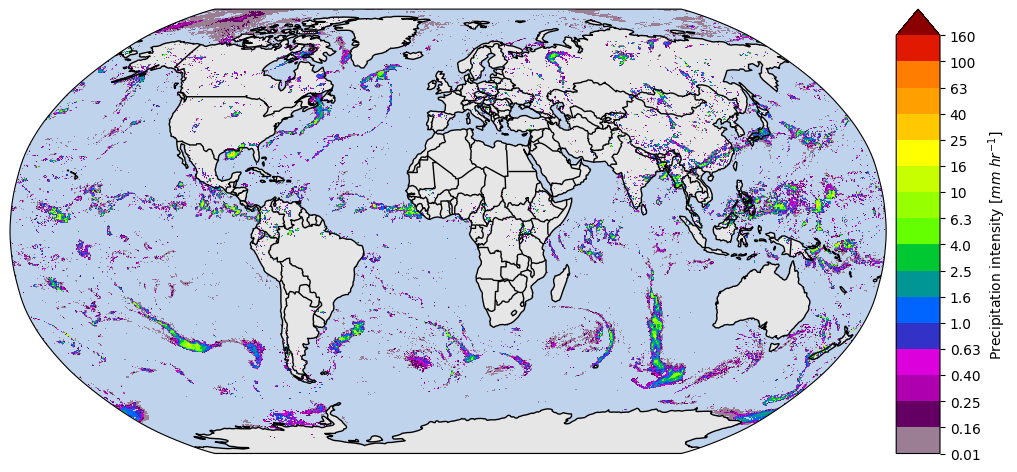

In [ ]:
# Define some figure options
dpi = 100
figsize = (12, 10)

# Example of Cartopy projections
crs_proj = ccrs.Robinson()  # ccrs.Orthographic(180, -90)

# Select a single variable
da = ds[variable]

# Create the map
fig, ax = plt.subplots(subplot_kw={"projection": crs_proj}, figsize=figsize, dpi=dpi)
ds[variable].isel(time=0).gpm.plot_map(ax=ax, add_labels=False, add_background=True, add_gridlines=False)
ax.set_global()

To plot multiple timesteps, it is necessary to specify the argument `col` and `col_wrap` or `row` and `row_wrap`.
The `col`/`row` argument specifies the dimension to be used to plot over the columns/rows, while the `col_wrap`/`row_wrap` argument enables to specify the number of plots to be displayed per column/row.

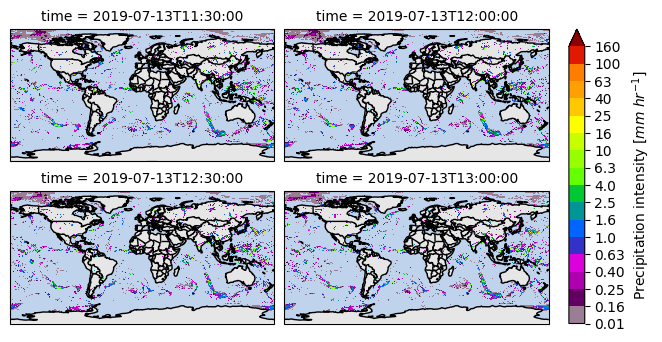

In [ ]:
ds[variable].isel(time=slice(0, 4)).gpm.plot_map(col="time", col_wrap=2, add_labels=False, add_gridlines=False)

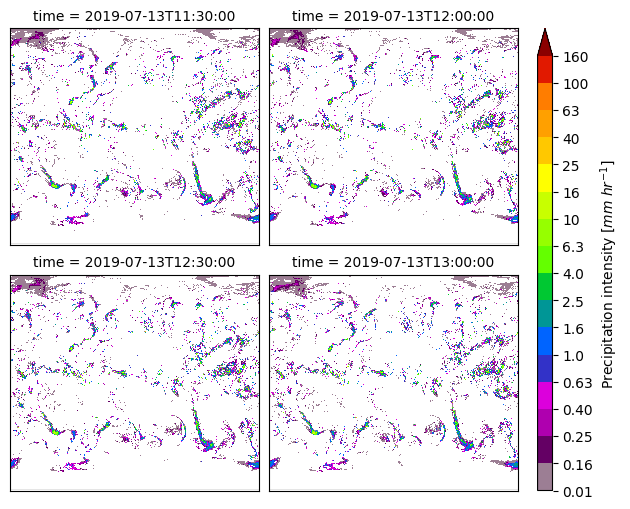

In [ ]:
ds[variable].gpm.plot_image(col="time", col_wrap=2, add_labels=False)

To facilitate the creation of a figure title, GPM-API also provide a `title` method:

In [ ]:
# Title for multi-timestep dataset
# - The add_timestep argument is not exploited !
print(ds[variable].gpm.title(add_timestep=False))
print(ds[variable].gpm.title(add_timestep=True))

IMERG-FR Precipitation
IMERG-FR Precipitation


In [ ]:
# Title for a single-timestep dataset
print(ds[variable].isel(time=0).gpm.title(add_timestep=True))

IMERG-FR Precipitation (2019-07-13 11:30)


When we visualize different product variables, GPM-API will automatically try to use different appropriate colormaps and colorbars. 
You can observe this in the following example:

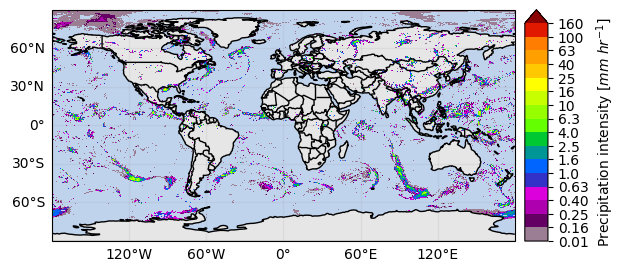

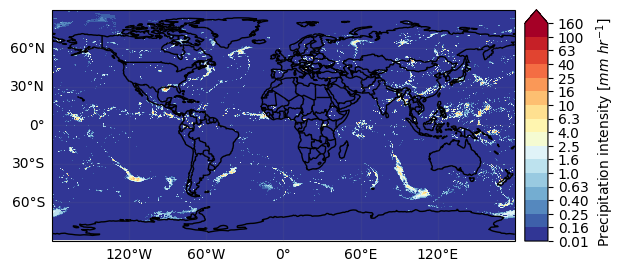

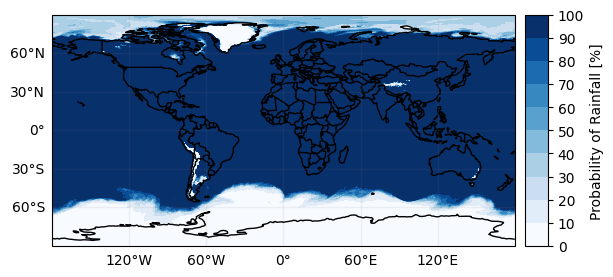

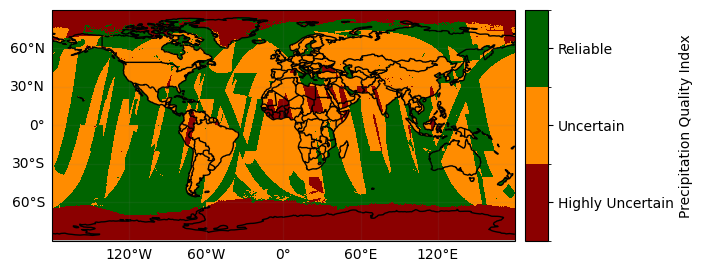

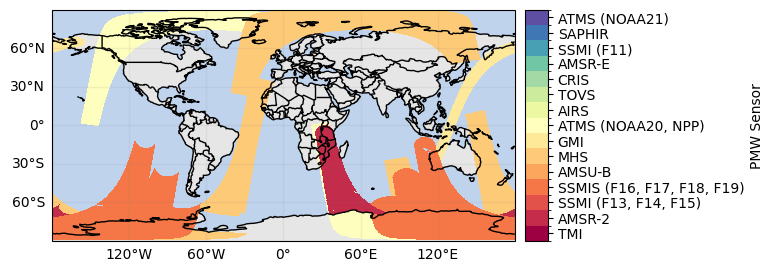

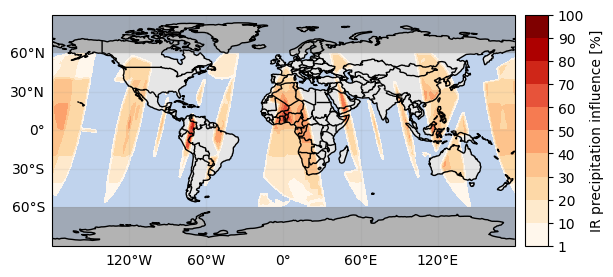

In [ ]:
ds_subset = ds.isel(time=0)

ds_subset["precipitation"].gpm.plot_map()
ds_subset["precipitation"].gpm.plot_map(cmap="RdYlBu_r")  # ex: enable to modify defaults parameters on the fly
ds_subset["probabilityLiquidPrecipitation"].gpm.plot_map()
ds_subset["precipitationQualityIndex"].gpm.plot_map()  # ex: defaults to categorical colorbar
ds_subset["MWprecipSource"].gpm.plot_map()  # ex: defaults to categorical colorbar
ds_subset["IRinfluence"].gpm.plot_map()

The registered colorbar configurations can be displayed using `gpm.colorbars.show_colorbars()` and the `plot_kwargs` and `cbar_kwargs` required to customize the figure can be obtained by calling the `gpm.get_plot_kwargs` function. Here below we provide an example on how to display PMW precipitation rates estimates using the same colorbar used by NASA to display IMERG liquid precipitation estimates.


GPM-API provides colormaps and colorbars tailored to GPM product variables with the goal of simplifying the data analysis and make it more reproducible.

The default colormap and colorbar configurations are defined into YAML files into the [gpm/etc/colorbars directory](https://github.com/ghiggi/gpm_api/blob/main/gpm/etc/colorbars/) of the software.

However, users are free to override, add and/or customize the colorbars configurations using the [pycolorbar](https://pycolorbar.readthedocs.io/en/latest/index.html) registry.


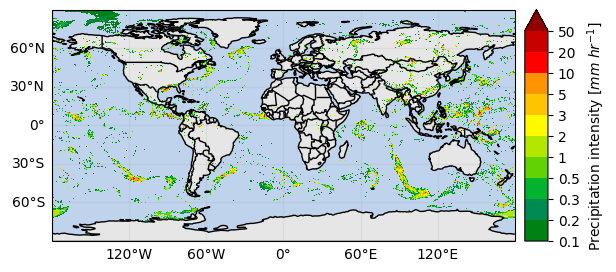

In [ ]:
plot_kwargs, cbar_kwargs = gpm.get_plot_kwargs("IMERG_Liquid")
ds_subset["precipitation"].gpm.plot_map(cbar_kwargs=cbar_kwargs, **plot_kwargs)

With some manipulations, it's possible to display a single map showing the phase of precipitation using the `probabilityLiquidPrecipitation` variable.

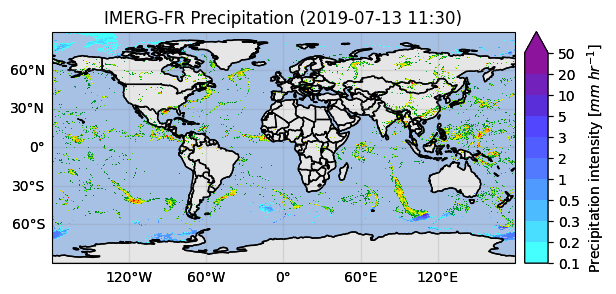

In [ ]:
ds_single_timestep = ds.isel(time=0)
da_is_liquid = ds_single_timestep["probabilityLiquidPrecipitation"] > 90
da_precip = ds_single_timestep[variable]
da_liquid = da_precip.where(da_is_liquid, 0)  # set to 0 where is not True
da_solid = da_precip.where(~da_is_liquid, 0)  # set to 0 where is True

plot_kwargs, cbar_kwargs = gpm.get_plot_kwargs("IMERG_Liquid")
p = da_liquid.gpm.plot_map(cbar_kwargs=cbar_kwargs, **plot_kwargs, add_colorbar=False)
plot_kwargs, cbar_kwargs = gpm.get_plot_kwargs("IMERG_Solid")
p = da_solid.gpm.plot_map(ax=p.axes, cbar_kwargs=cbar_kwargs, **plot_kwargs, add_colorbar=False)
_ = p.axes.set_title(label=da_solid.gpm.title())

## 5. Geospatial Manipulations

GPM-API provides methods to easily spatially subset grids by extent, country or continent.

The method `crop_by_extent`, `crop_by_country` and ` crop_by_continent` enable to select the data within your area of interest. 

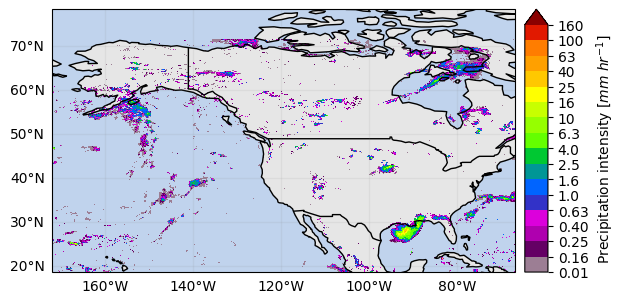

In [ ]:
# Crop by extent
extent = get_country_extent("United States")
ds_us = ds.gpm.crop(extent=extent)
ds_us[variable].isel(time=0).gpm.plot_map()

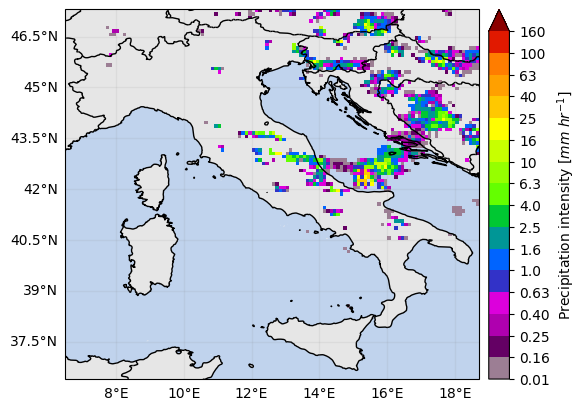

In [ ]:
# Crop by country name
ds_italy = ds.gpm.crop_by_country("Italy")
ds_italy[variable].isel(time=0).gpm.plot_map()

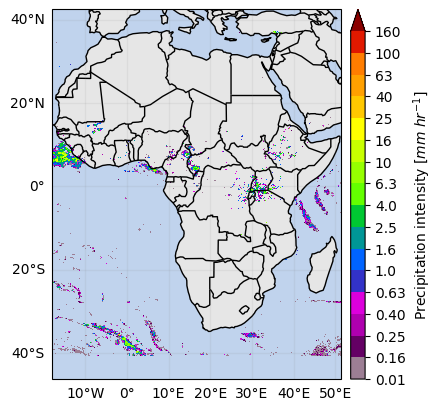

In [ ]:
# Crop by continent
ds_africa = ds.gpm.crop_by_continent("Africa")
ds_africa[variable].isel(time=0).gpm.plot_map()

You can also easily crop the data around a given point (i.e. ground radar location) using the `crop_around_point` method:

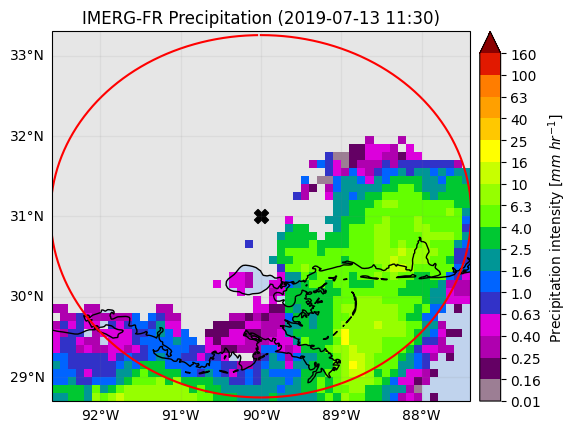

In [ ]:
# Crop around a point (i.e. radar location)
lon = -90
lat = 31
distance = 250_000  # 250 km
ds_subset = ds.gpm.crop_around_point(lon=lon, lat=lat, distance=distance)
da_subset = ds_subset[variable].isel(time=0)
# Define ROI coordinates
circle_lons, circle_lats = get_circle_coordinates_around_point(
    lon,
    lat,
    radius=distance,
    num_vertices=360,
)

# Plot
p = da_subset.gpm.plot_map()
p.axes.set_title(da_subset.gpm.title(add_timestep=True))
p.axes.plot(circle_lons, circle_lats, "r-", transform=ccrs.Geodetic())
p.axes.scatter(lon, lat, c="black", marker="X", s=100, transform=ccrs.Geodetic())

Please keep in mind that you can easily retrieve the extent of a GPM xarray object using the `extent` method. 

The optional argument `padding` allows to expand/shrink the geographic extent by custom lon/lat degrees, while the `size` argument allows 
to obtain an extent centered on the GPM object with the desired size.

In [ ]:
print(da_subset.gpm.extent(padding=0.1))  # expanding
print(da_subset.gpm.extent(padding=-0.1))  # shrinking
print(da_subset.gpm.extent(size=0.5))
print(da_subset.gpm.extent(size=0))  # centroid

Extent(xmin=-92.64999542236328, xmax=-87.3499969482422, ymin=28.65, ymax=33.35)
Extent(xmin=-92.44999542236329, xmax=-87.54999694824218, ymin=28.85, ymax=33.15)
Extent(xmin=-90.24999618530273, xmax=-89.74999618530273, ymin=30.75, ymax=31.25)
Extent(xmin=-89.99999618530273, xmax=-89.99999618530273, ymin=31.0, ymax=31.0)


## 6 Storm Labeling

Using the xarray `ximage` accessor, it is possible to easily delineate (label) the precipitating areas. The label array is added to the dataset as a new coordinate.
Currently is only possible to label DataArrays with a single timestep !

The array currently contains 1227 labels and 'max_n_labels'
            is set to 50. The colorbar is not displayed!


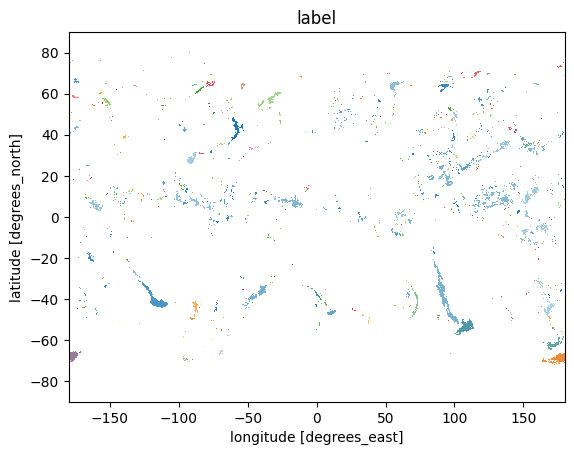

In [ ]:
# Retrieve labeled xarray object
ds_single = ds.isel(time=0)
label_name = "label"
ds_single = ds_single.ximage.label(
    variable="precipitation",
    min_value_threshold=1,
    min_area_threshold=5,
    footprint=2,  # assign same label to precipitating areas 5 pixels apart
    sort_by="maximum",  # "maximum", "minimum", <custom_function>
    sort_decreasing=True,
    label_name=label_name,
)
# Plot full label array
ds_single[label_name].ximage.plot_labels()

Let's zoom in a specific region:

The array currently contains 75 labels
        and 'max_n_labels' is set to 50. The colorbar is not displayed!


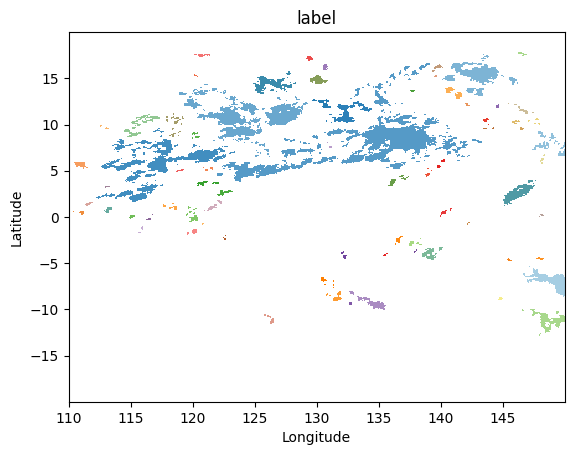

In [ ]:
gpm.plot_labels(ds_single[label_name].sel(lon=slice(110, 150), lat=slice(-20, 20)))

## 7. Patch Extraction

With the xarray `ximage` accessor, it is also possible to extract patches around the precipitating areas. Here we provide a minimal example on how to proceed:

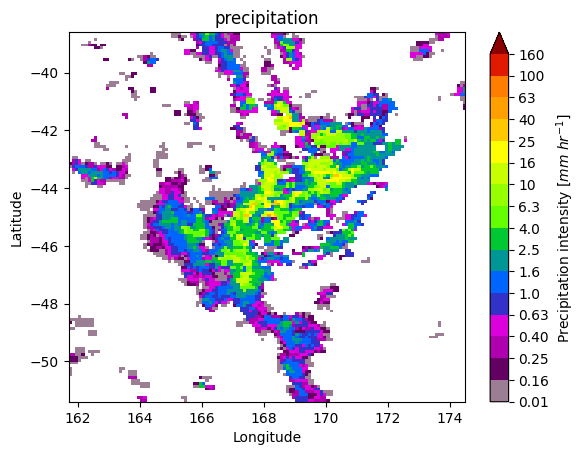

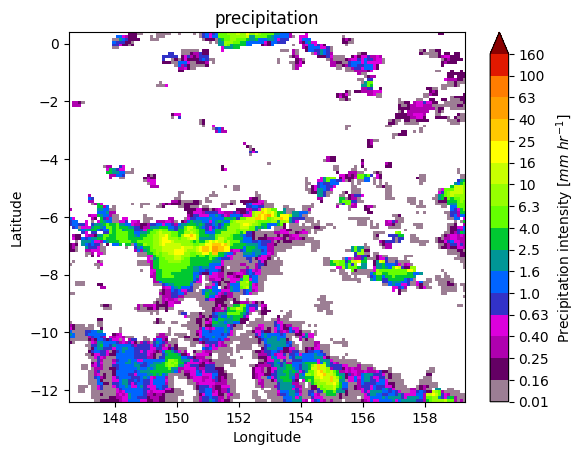

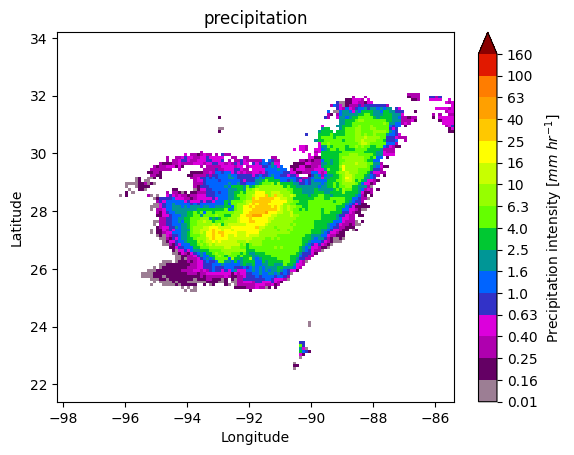

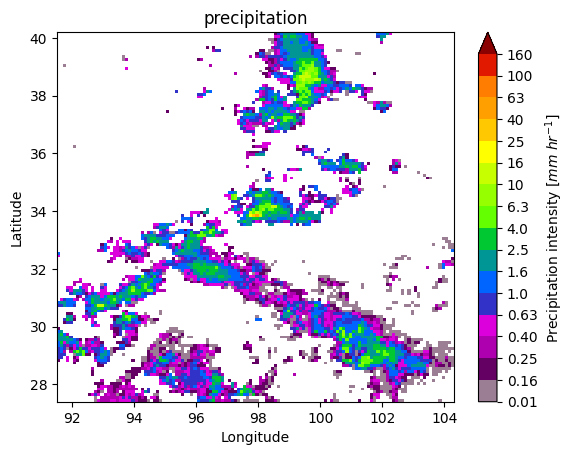

In [ ]:
# Define the patch generator
da_patch_gen = ds_single["precipitation"].ximage.label_patches(
    label_name=label_name,
    patch_size=(128, 128),
    # Output options
    n_patches=4,
    # Patch extraction Options
    padding=0,
    centered_on="max",
    # Tiling/Sliding Options
    debug=False,
    verbose=False,
)

# # Retrieve list of patches
list_label_patches = list(da_patch_gen)
list_da = [da for label, da in list_label_patches]

# Display patches
gpm.plot_patches(list_label_patches)

You can exploit the xarray manipulations and FacetGrid capabilities to quickly create the following figure:

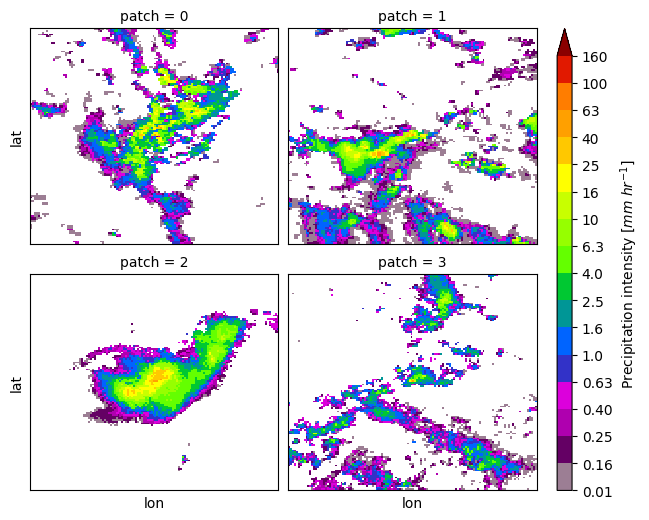

In [ ]:
list_da_without_coords = [da.drop_vars(["lon", "lat"]) for da in list_da]
da_patch = xr.concat(list_da_without_coords, dim="patch")
da_patch.isel(patch=slice(0, 4)).gpm.plot_image(col="patch", col_wrap=2)